#reference

https://discuss.pytorch.org/t/can-we-use-pre-trained-word-embeddings-for-weight-initialization-in-nn-embedding/1222

https://pytorch.org/text/stable/vocab.html


https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html


https://discuss.pytorch.org/t/can-we-use-pre-trained-word-embeddings-for-weight-initialization-in-nn-embedding/1222

https://stackoverflow.com/questions/56741087/how-to-fix-runtimeerror-expected-object-of-scalar-type-float-but-got-scalar-typ

https://pytorch.org/docs/stable/generated/torch.nn.EmbeddingBag.html

https://discuss.pytorch.org/t/when-should-i-use-sparse-embedding-instead-of-dense-embedding/29084

In [ ]:
import torch
import re
import pandas as pd
import sklearn as sk

In [ ]:
#connect Gdrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load glove embedding and pass it to our model
glove = pd.read_csv('drive/MyDrive/Colab Notebooks/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

## preprocess data


In [ ]:
glove_embedding['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
glove_embedding['the'].shape

(100,)

In [ ]:
glove_embedding['0']

array([-0.61491  ,  0.92734  ,  0.55826  ,  0.0057455, -0.67172  ,
        0.61189  ,  0.99226  ,  0.27641  , -0.64889  , -0.51675  ,
        1.1789   , -1.1631   , -0.90994  ,  0.5714   ,  1.0018   ,
        0.20675  ,  0.36751  ,  0.46931  ,  0.096868 ,  1.4351   ,
        1.3924   ,  0.4589   ,  0.65491  ,  1.0463   ,  0.11249  ,
        0.56988  ,  0.76595  ,  0.45246  ,  0.48627  , -0.74383  ,
       -0.21478  ,  0.7041   ,  0.068082 ,  0.54945  , -0.012204 ,
       -0.18558  ,  0.4266   ,  0.90742  , -0.62418  ,  0.56063  ,
        0.9091   , -1.4814   ,  0.39494  , -1.2353   ,  0.39864  ,
       -0.86375  ,  0.51337  ,  0.36805  ,  0.2084   ,  0.068722 ,
       -0.011695 , -0.48135  , -0.61458  ,  1.2844   , -1.2055   ,
       -1.929    , -0.48368  , -0.67811  ,  0.15408  ,  0.15402  ,
       -1.4051   , -1.5294   , -1.2464   , -0.38637  ,  0.89358  ,
        0.71173  , -1.0529   ,  0.64586  , -0.16673  ,  0.53946  ,
       -1.1164   ,  0.19146  ,  0.55717  ,  0.031212 ,  0.7696

In [ ]:
import pickle
with open('drive/MyDrive/Colab Notebooks/hmx_preprocessed2.pkl','rb') as f: 
    train_validated, test_validated = pickle.load(f)

In [ ]:
print(train_validated[0:3])

[(1, "unfortunately , the frustration of being dr . goldberg's patient is a repeat of the experience i've had with so many other doctor in nyc good doctor , terrible staff . it seems that his staff simply never answer the phone . it usually take 2 hour of repeated calling to get an answer . who ha time for that or want to deal with it ? i have run into this problem with many other doctor and i just don't get it . you have office worker , you have patient with medical need , why isn't anyone answering the phone ? it's incomprehensible and not work the aggravation . it's with regret that i feel that i have to give dr . goldberg 2 star ."), (2, "been going to dr . goldberg for over 10 year . i think i was one of his 1st patient when he started at mhmg . he's been great over the year and is really all about the big picture . it is because of him , not my now former gyn dr . markoff , that i found out i have fibroid . he explores all option with you and is very patient and understanding . h

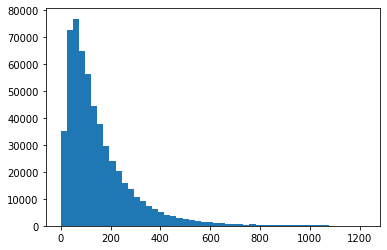

In [ ]:
import matplotlib.pyplot as plt
review_lengths = []
for _,review_text in train_validated:
    review_text=review_text.split()
    review_lengths.append(len(review_text))

plt.hist(review_lengths, bins=50)
plt.show()

In [ ]:
MAX_REVIEW_LENGTH = 300

def filter_output_by_length(review_text):
#     print(review_text[:5])
    return len(review_text.split()) <= MAX_REVIEW_LENGTH

In [ ]:
import numpy as np
train_filtered=[]
for i,j in train_validated:
  if filter_output_by_length(j):
    train_filtered.append((i,j))

print('Dataset size BEFORE filtering: ', len(train_validated))
print('Dataset size AFTER filtering: ', len(train_filtered))
print('Number of eliminated recipes: ', len(train_validated) - len(train_filtered))

Dataset size BEFORE filtering:  560000
Dataset size AFTER filtering:  495958
Number of eliminated recipes:  64042


In [ ]:
a=0
for i,j in train_filtered:
  #print(i)
  if i==2:
    a+=1
print(a)#train 

257370


In [ ]:
a=0
for i,j in test_validated:
  #print(i)
  if i==1:
    a+=1
print(a)#test

19000


In [ ]:
print(train_filtered[0:3])

[(1, "unfortunately , the frustration of being dr . goldberg's patient is a repeat of the experience i've had with so many other doctor in nyc good doctor , terrible staff . it seems that his staff simply never answer the phone . it usually take 2 hour of repeated calling to get an answer . who ha time for that or want to deal with it ? i have run into this problem with many other doctor and i just don't get it . you have office worker , you have patient with medical need , why isn't anyone answering the phone ? it's incomprehensible and not work the aggravation . it's with regret that i feel that i have to give dr . goldberg 2 star ."), (2, "been going to dr . goldberg for over 10 year . i think i was one of his 1st patient when he started at mhmg . he's been great over the year and is really all about the big picture . it is because of him , not my now former gyn dr . markoff , that i found out i have fibroid . he explores all option with you and is very patient and understanding . h

## add in glove embedding

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_filtered), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

In [ ]:
len(vocab)

164494

In [ ]:
#load new embedding into weights_matrix
emb_dim=100
matrix_len = len(vocab)
weights_matrix = np.zeros((matrix_len, emb_dim))
print(weights_matrix.shape)
words_found = 0
#interate through all the vocab
for i, word in enumerate(vocab.get_stoi()):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        weights_matrix[i] = np.random.normal(scale=0.6, size=(emb_dim, ))

(164494, 100)


In [ ]:
#define the dataloader which store all the dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch.utils.data import DataLoader
# batch include label, text, offset
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]#8consective index, corressponding word, len of text, pointer to start
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         b=text_pipeline(_text)
         a=len(b)
         #print(len(b))
         if a<300:
            b+=[0]*(300-a)
         #processed_text = torch.tensor(b, dtype=torch.int64)
         elif a>300:
           b=b[0:300]
         
         processed_text = torch.tensor(b, dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
         #print('offset',processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)
#split text in to group of 8，shuffle=false: remain the same size, dataloader is to pass to model
dataloader = DataLoader(train_filtered, batch_size=8, shuffle=False, collate_fn=collate_batch)

sfjkjkkkkkkkkkkkkkkkkkk

In [ ]:
a=np.array([[100, 3], [2, 4],[3,1]],dtype=np.float32)
b=nn.EmbeddingBag.from_pretrained(torch.from_numpy(a))
print(b.weight)


Parameter containing:
tensor([[100.,   3.],
        [  2.,   4.],
        [  3.,   1.]])


In [ ]:
weight = torch.FloatTensor([[1, 2.3, 3], [4, 5.1, 6.3]])
embeddingbag = nn.EmbeddingBag.from_pretrained(weight)
# Get embeddings for index 1
input = torch.LongTensor([[1,0,0],[0,0,1]])
embeddingbag(input)

tensor([[2.0000, 3.2333, 4.1000],
        [2.0000, 3.2333, 4.1000]])

In [ ]:
from torch import nn
class CNN(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class,frozen):
        super(CNN, self).__init__()
        #self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)#
        if frozen==True:
          self.embedding = nn.EmbeddingBag.from_pretrained(torch.from_numpy(weights_matrix))#load new embedding from weights_matrix
        else:
          self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.conv1 = nn.Sequential(  #define the model
            nn.Conv1d(in_channels=embed_dim, out_channels=16, kernel_size=1),     #16 features, see each word
            nn.ReLU()                                                             #convert negative to 0
        )
        self.fc = nn.Linear(16, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        # self.fc.weight.data.uniform_(-initrange, initrange)
        # self.fc.bias.data.zero_()

    def forward(self, text, offsets):
      #good luck, i dont know
        #
        x = self.embedding(text, offsets).unsqueeze(2)
        #print('embedd',x)
        #print('here',x.shape)
        x = self.conv1(x)-
        
        x = x.view(-1, 16)
        x = self.fc(x)
        return x

In [ ]:
num_class = len(set([label for (label, text) in train_validated]))
print(num_class)

2


In [ ]:
weights_matrix.dtype

dtype('float64')

In [ ]:
vocab_size = len(vocab)
emsize = 100
frozen=False
if (frozen==True):
    model = CNN(vocab_size, emsize, num_class,True).to(device)#
else:
    model = CNN(vocab_size, emsize, num_class,False).to(device)#
    model.embedding.weight=torch.nn.Parameter(torch.from_numpy(weights_matrix))

model.double() #conver value to double

CNN(
  (embedding): EmbeddingBag(164494, 100, mode=mean)
  (conv1): Sequential(
    (0): Conv1d(100, 16, kernel_size=(1,), stride=(1,))
    (1): ReLU()
  )
  (fc): Linear(in_features=16, out_features=2, bias=True)
)

In [ ]:

import time
from tqdm import tqdm
def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in tqdm(enumerate(dataloader)):#iterate through all dataloader base on batch size
        optimizer.zero_grad()
        predited_label = model(text, offsets)
        loss = criterion(predited_label, label) #calc cross entropy loss
        loss.backward() #backward propgation, modify embedding, fc, 
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step() #update everything
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)# calc accuracy
        if idx % log_interval == 0 and idx > 0:#print accuracy
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| train accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            print('train loss',loss)
            total_acc, total_count = 0, 0
            start_time = time.time()
    return total_acc/total_count,loss

def evaluate(dataloader):
    model.eval()#set eval mode, will not change weight embedding
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count,loss

In [ ]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 250 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_dataset = to_map_style_dataset(train_validated)
test_dataset = to_map_style_dataset(test_validated)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)



In [ ]:
valAcc=[]
trainAcc=[]
valLoss=[]
trainLoss=[]

for epoch in range(1, EPOCHS + 1):
    #print(epoch,epoch.dtype)
    
    epoch_start_time = time.time()
    accu_train,loss_train=train(train_dataloader)
    accu_val,loss_val = evaluate(valid_dataloader)
    valAcc.append(accu_val)
    trainAcc.append(accu_train)
    valLoss.append(loss_val)
    trainLoss.append(loss_train)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    torch.save(model, 'drive/MyDrive/Colab Notebooks/unfrozen'+str(epoch)+'.pkl')
    print('-' * 59)

502it [01:14,  6.57it/s]

| epoch   1 |   500/ 2128 batches | train accuracy    0.545
train loss tensor(0.6396, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:28,  6.72it/s]

| epoch   1 |  1000/ 2128 batches | train accuracy    0.591
train loss tensor(0.5844, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:43,  6.93it/s]

| epoch   1 |  1500/ 2128 batches | train accuracy    0.607
train loss tensor(0.9908, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [04:58,  6.47it/s]

| epoch   1 |  2000/ 2128 batches | train accuracy    0.619
train loss tensor(0.6407, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:17,  6.71it/s]


-----------------------------------------------------------
| end of epoch   1 | time: 321.44s | valid accuracy    0.571 
-----------------------------------------------------------


502it [01:16,  6.66it/s]

| epoch   2 |   500/ 2128 batches | train accuracy    0.633
train loss tensor(1.0957, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:32,  6.62it/s]

| epoch   2 |  1000/ 2128 batches | train accuracy    0.643
train loss tensor(0.5389, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:48,  6.75it/s]

| epoch   2 |  1500/ 2128 batches | train accuracy    0.640
train loss tensor(0.5876, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:03,  6.55it/s]

| epoch   2 |  2000/ 2128 batches | train accuracy    0.650
train loss tensor(0.5747, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:22,  6.59it/s]


-----------------------------------------------------------
| end of epoch   2 | time: 327.50s | valid accuracy    0.787 
-----------------------------------------------------------


502it [01:16,  6.41it/s]

| epoch   3 |   500/ 2128 batches | train accuracy    0.654
train loss tensor(0.5464, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:31,  6.56it/s]

| epoch   3 |  1000/ 2128 batches | train accuracy    0.653
train loss tensor(0.7707, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:47,  6.58it/s]

| epoch   3 |  1500/ 2128 batches | train accuracy    0.665
train loss tensor(0.5777, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:03,  6.50it/s]

| epoch   3 |  2000/ 2128 batches | train accuracy    0.659
train loss tensor(0.7297, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:22,  6.59it/s]


-----------------------------------------------------------
| end of epoch   3 | time: 327.05s | valid accuracy    0.728 
-----------------------------------------------------------


502it [01:17,  6.60it/s]

| epoch   4 |   500/ 2128 batches | train accuracy    0.814
train loss tensor(0.4327, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:32,  6.71it/s]

| epoch   4 |  1000/ 2128 batches | train accuracy    0.816
train loss tensor(0.4036, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:48,  6.52it/s]

| epoch   4 |  1500/ 2128 batches | train accuracy    0.817
train loss tensor(0.3748, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:03,  6.34it/s]

| epoch   4 |  2000/ 2128 batches | train accuracy    0.819
train loss tensor(0.3984, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:23,  6.59it/s]


-----------------------------------------------------------
| end of epoch   4 | time: 327.62s | valid accuracy    0.813 
-----------------------------------------------------------


502it [01:16,  6.47it/s]

| epoch   5 |   500/ 2128 batches | train accuracy    0.818
train loss tensor(0.4031, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:31,  6.52it/s]

| epoch   5 |  1000/ 2128 batches | train accuracy    0.823
train loss tensor(0.4036, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:47,  6.46it/s]

| epoch   5 |  1500/ 2128 batches | train accuracy    0.823
train loss tensor(0.4304, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:02,  6.56it/s]

| epoch   5 |  2000/ 2128 batches | train accuracy    0.824
train loss tensor(0.3850, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:21,  6.62it/s]


-----------------------------------------------------------
| end of epoch   5 | time: 326.00s | valid accuracy    0.831 
-----------------------------------------------------------


502it [01:16,  6.89it/s]

| epoch   6 |   500/ 2128 batches | train accuracy    0.824
train loss tensor(0.3661, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:32,  6.69it/s]

| epoch   6 |  1000/ 2128 batches | train accuracy    0.825
train loss tensor(0.3644, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:48,  6.71it/s]

| epoch   6 |  1500/ 2128 batches | train accuracy    0.825
train loss tensor(0.3989, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:04,  6.50it/s]

| epoch   6 |  2000/ 2128 batches | train accuracy    0.827
train loss tensor(0.4232, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:23,  6.57it/s]


-----------------------------------------------------------
| end of epoch   6 | time: 328.01s | valid accuracy    0.827 
-----------------------------------------------------------


502it [01:16,  6.56it/s]

| epoch   7 |   500/ 2128 batches | train accuracy    0.844
train loss tensor(0.3755, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:32,  6.95it/s]

| epoch   7 |  1000/ 2128 batches | train accuracy    0.844
train loss tensor(0.3252, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:47,  6.37it/s]

| epoch   7 |  1500/ 2128 batches | train accuracy    0.843
train loss tensor(0.3510, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:02,  6.95it/s]

| epoch   7 |  2000/ 2128 batches | train accuracy    0.842
train loss tensor(0.3656, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:21,  6.62it/s]


-----------------------------------------------------------
| end of epoch   7 | time: 326.10s | valid accuracy    0.843 
-----------------------------------------------------------


502it [01:16,  6.72it/s]

| epoch   8 |   500/ 2128 batches | train accuracy    0.845
train loss tensor(0.3757, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:31,  6.67it/s]

| epoch   8 |  1000/ 2128 batches | train accuracy    0.844
train loss tensor(0.3640, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:46,  6.47it/s]

| epoch   8 |  1500/ 2128 batches | train accuracy    0.843
train loss tensor(0.3211, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:02,  6.76it/s]

| epoch   8 |  2000/ 2128 batches | train accuracy    0.845
train loss tensor(0.3034, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:21,  6.62it/s]


-----------------------------------------------------------
| end of epoch   8 | time: 325.97s | valid accuracy    0.846 
-----------------------------------------------------------


502it [01:16,  6.60it/s]

| epoch   9 |   500/ 2128 batches | train accuracy    0.845
train loss tensor(0.3108, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:32,  6.76it/s]

| epoch   9 |  1000/ 2128 batches | train accuracy    0.846
train loss tensor(0.3037, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:47,  6.40it/s]

| epoch   9 |  1500/ 2128 batches | train accuracy    0.846
train loss tensor(0.3053, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [05:02,  6.63it/s]

| epoch   9 |  2000/ 2128 batches | train accuracy    0.847
train loss tensor(0.3596, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:21,  6.62it/s]


-----------------------------------------------------------
| end of epoch   9 | time: 325.85s | valid accuracy    0.847 
-----------------------------------------------------------


502it [01:15,  6.33it/s]

| epoch  10 |   500/ 2128 batches | train accuracy    0.847
train loss tensor(0.3389, dtype=torch.float64, grad_fn=<NllLossBackward>)


1002it [02:29,  6.84it/s]

| epoch  10 |  1000/ 2128 batches | train accuracy    0.847
train loss tensor(0.3893, dtype=torch.float64, grad_fn=<NllLossBackward>)


1502it [03:44,  6.57it/s]

| epoch  10 |  1500/ 2128 batches | train accuracy    0.846
train loss tensor(0.4203, dtype=torch.float64, grad_fn=<NllLossBackward>)


2002it [04:58,  6.53it/s]

| epoch  10 |  2000/ 2128 batches | train accuracy    0.848
train loss tensor(0.3298, dtype=torch.float64, grad_fn=<NllLossBackward>)


2128it [05:17,  6.70it/s]


-----------------------------------------------------------
| end of epoch  10 | time: 322.12s | valid accuracy    0.849 
-----------------------------------------------------------


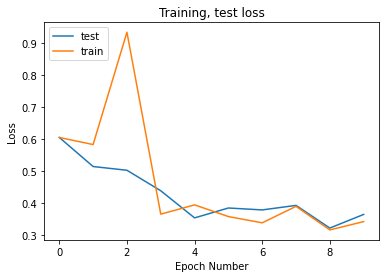

In [ ]:
plt.title('Training, test loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(valLoss,label='test')
plt.plot(trainLoss,label='train')
#plt.plot(Val_loss,label='validation')
plt.plot()
plt.legend(loc='upper left')

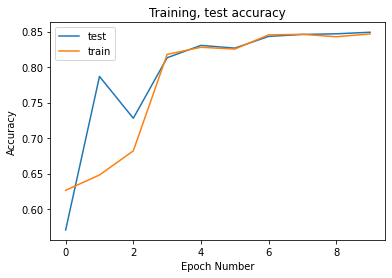

In [ ]:
plt.title('Training, test accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(valAcc,label='test')
plt.plot(trainAcc,label='train')
#plt.plot(Val_loss,label='validation')
plt.plot()
plt.legend(loc='upper left')

In [ ]:
# not as good as before, as this does not suit pretrained embedding
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print(accu_test)

Checking the results of test dataset.
(0.850078947368421, tensor(0.3929, dtype=torch.float64))


In [ ]:
reviews_label = {1: "Negative",
                 2: "Positive"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = ["No !","yep , but no .","Actually , no movie is as bad as this ! ","Not at all a bad movie", "No No No ! How can it be so good !"]

model = model.to("cpu")

for i in range(len(ex_text_str)):
  print(ex_text_str[i]+" is a %s reviews" %reviews_label[predict(ex_text_str[i], text_pipeline)])

No ! is a Negative reviews
yep , but no . is a Negative reviews
Actually , no movie is as bad as this !  is a Negative reviews
Not at all a bad movie is a Negative reviews
No No No ! How can it be so good ! is a Negative reviews


In [ ]:
print(model.embedding.weight)

In [ ]:
import torch
input = torch.randn(2).unsqueeze(0)

In [ ]:
input

tensor([[1.1867, 0.3499]])

In [ ]:
torch.randn(2)

tensor([-0.9163,  0.0097])

In [ ]:
m = nn.ReLU()
input = torch.randn(2).unsqueeze(0)
output = m(-input)

In [ ]:
output

tensor([[0., 0.]])